<a href="https://colab.research.google.com/github/noe2019/Fashion/blob/master/Final_Version_fashion550k_EDA_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion 550k_EDA_Fastai
This notebook presents an explanatory data analysis (EDA) for Fashion 550k dataset, using fastai library. This library  is implemented in pytorch and has the advantage of being faster than the classical keras and tensorflow. 

The dataset can be dowloaded [here.](https://esslab.jp/~ess//data/Fashion550k_v1.tar.gz).

This dataset consist of 405,589 images downloaded from [Chictopia](http://www.chictopia.com/) with 66 labels.

This EDA was made following the steps bellow:


# Setting Fastai Environment

This notebook utilizes the version 0.6.0 of Fastai

In [0]:
!pip3 install fastai==0.6.0

    100% |████████████████████████████████| 430kB 25.4MB/s 
    100% |████████████████████████████████| 1.4MB 16.0MB/s 
    100% |████████████████████████████████| 1.5MB 17.4MB/s 
    100% |████████████████████████████████| 184kB 32.4MB/s 
    100% |████████████████████████████████| 20.9MB 2.0MB/s 
    100% |████████████████████████████████| 3.6MB 1.4MB/s 
    100% |████████████████████████████████| 71kB 27.2MB/s 
    100% |████████████████████████████████| 51kB 23.8MB/s 
    100% |████████████████████████████████| 5.2MB 7.2MB/s 
    100% |████████████████████████████████| 11.6MB 4.1MB/s 
    100% |████████████████████████████████| 92kB 30.4MB/s 
    100% |████████████████████████████████| 481kB 18.8MB/s 
    100% |████████████████████████████████| 870kB 22.9MB/s 
    100% |████████████████████████████████| 81kB 25.4MB/s 
    100% |████████████████████████████████| 61kB 22.6MB/s 
    100% |████████████████████████████████| 591.8MB 29kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x60e

In [0]:
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.1.post4-cp36-cp36m-linux_x86_64.whl 
!pip3 install torchvision

  HTTP error 403 while getting http://download.pytorch.org/whl/cu80/torch-0.3.1.post4-cp36-cp36m-linux_x86_64.whl
  Could not install requirement torch==0.3.1.post4 from http://download.pytorch.org/whl/cu80/torch-0.3.1.post4-cp36-cp36m-linux_x86_64.whl because of error 403 Client Error: Forbidden for url: http://download.pytorch.org/whl/cu80/torch-0.3.1.post4-cp36-cp36m-linux_x86_64.whl
Could not install requirement torch==0.3.1.post4 from http://download.pytorch.org/whl/cu80/torch-0.3.1.post4-cp36-cp36m-linux_x86_64.whl because of HTTP error 403 Client Error: Forbidden for url: http://download.pytorch.org/whl/cu80/torch-0.3.1.post4-cp36-cp36m-linux_x86_64.whl for URL http://download.pytorch.org/whl/cu80/torch-0.3.1.post4-cp36-cp36m-linux_x86_64.whl
    100% |████████████████████████████████| 61kB 2.4MB/s 
    100% |████████████████████████████████| 2.0MB 11.5MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [0]:
  !apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
  import cv2
  from os import path
  from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
  platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
  accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'
  !pip install --upgrade pip
  #!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
  !pip uninstall -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
  #!pip install -q http://download.pytorch.org/whl/cu80/torch-0.3.1-cp36-cp36m-linux_x86_64.whl torchvision
  #!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.2.0.post3-cp36-cp36m-manylinux1_x86_64.whl
  !pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.1-{platform}-linux_x86_64.whl torchvision

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (18.1)
Proceed (y/n)? y
Proceed (y/n)? y


In [0]:
from torch import * 
!pip install Pillow==4.1.1
!pip install image
%matplotlib inline
from fastai.imports import *

    100% |████████████████████████████████| 5.7MB 7.5MB/s 
  Found existing installation: Pillow 5.4.1
    Uninstalling Pillow-5.4.1:
      Successfully uninstalled Pillow-5.4.1


In [0]:
!pip install "torchtext==0.2.3"

    100% |████████████████████████████████| 51kB 2.0MB/s 
  Running setup.py bdist_wheel for torchtext ... - done
  Stored in directory: /root/.cache/pip/wheels/42/a6/f4/b267328bde6bb680094a0c173e8e5627ccc99543abded97204
Successfully built torchtext
  Found existing installation: torchtext 0.3.1
    Uninstalling torchtext-0.3.1:
      Successfully uninstalled torchtext-0.3.1


In [0]:
!pip install opencv-python

In [0]:
import cv2
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

# Downloading and untar the Fashion 550k


In [0]:
!gcloud auth login

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&prompt=select_account&response_type=code&client_id=32555940559.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&access_type=offline


Enter verification code: 4/0gCwmFV2D2Z06FuHWWQJjNBinWxmG8sflqFQ3GYzlcp6UDjo3X8Yzlw
If you need to use ADC, see:
  gcloud auth application-default --help

You are now logged in as [noe.fouotsa@aims-cameroon.org].
Your current project is [None].  You can change this setting by running:
  $ gcloud config set project PROJECT_ID


In [0]:
!gsutil -m cp -r gs://platform-ai-research/datasets/fashion550k/Fashion550k_v1.tar.gz .

Copying gs://platform-ai-research/datasets/fashion550k/Fashion550k_v1.tar.gz...
| [1/1 files][  7.2 GiB/  7.2 GiB] 100% Done  37.8 MiB/s ETA 00:00:00           
Operation completed over 1 objects/7.2 GiB.                                      


In [0]:
!tar -xvf Fashion550k_v1.tar.gz

fashion550k/
fashion550k/photos/
fashion550k/photos/101/
fashion550k/photos/101/10158082335-10158082335_400.jpg
fashion550k/photos/101/10100049146-10100049146_400.jpg
fashion550k/photos/101/10176803622-10176803622_400.jpg
fashion550k/photos/101/10173255899-10173255899_400.jpg
fashion550k/photos/101/10144327041-beige-h-m-shirt-brown-zara-skirt-black-zara-shoes-black-vintage-belt-bla_400.jpg
fashion550k/photos/101/10168197759-black-portmans-blazer_400.jpg
fashion550k/photos/101/10189354050-black-shoes_400.jpg
fashion550k/photos/101/10113708934-black-khombu-boots-charcoal-gray-target-socks-heather-gray-victorias-secret-_400.jpg
fashion550k/photos/101/10199512857-olive-green-yellow-dotted-vintage-dress-dark-brown-leather-purse-dark-brown-_400.jpg
fashion550k/photos/101/10146635747-black-military-blazer-jacket-tawny-leather-bag-black-mocassins-flats-beige_400.jpg
fashion550k/photos/101/10123322756-burnt-orange-goodwill-bag-mustard-china-boots-light-pink-kohls-sweater_400.jpg
fashion550k/pho

# EDA Fashion550k

In [0]:
import os
import numpy as np

In [0]:
path = "fashion550k"
os.listdir(path)

['validids.npy',
 'photos',
 'trainids.npy',
 'annotation',
 'photos.txt',
 'testids.npy',
 'noisyids.npy',
 'duplicateids.npy',
 'train_ids.npy',
 'README.md']

In [0]:
!cat /content//fashion550k/README.md

Fashion550k Dataset

OVERVIEW
--------

This is the Fashion550k dataset subset release that accompanies the paper:

```
   Multi-Label Fashion Image Classification with Minimal Human Supervision
   Naoto Inoue, Edgar Simo-Serra, Toshihiko Yamasaki and Hiroshi Ishikawa
   Workshop on Computer Vision for Fashion, International Computer Vision Conference (CVF-ICCV), 2017
```

If you use this data, please cite it as:
```
@InProceedings{InoueICCVW2017,
   author    = {Naoto Inoue and Edgar Simo-Serra and Toshihiko Yamasaki and Hiroshi Ishikawa},
   title     = {{Multi-Label Fashion Image Classification with Minimal Human Supervision}},
   booktitle = "Proceedings of the International Conference on Computer Vision Workshops (ICCVW)",
   year      = 2017,
}
```

LICENSE
-------

By using this data you agree to the following terms and conditions:

 1. You shall use the Database only for non-commercial research and educational purposes.
 2. The authors and their respective institutions make no 

##  Exploring the photos path



In [0]:
import os

### Looking at the directory

There are 900 paths in the photo directory starting from 100 to 999

In [0]:
!ls {path}/photos

100  157  214  271  328  385  442  499	556  613  670  727  784  841  898  955
101  158  215  272  329  386  443  500	557  614  671  728  785  842  899  956
102  159  216  273  330  387  444  501	558  615  672  729  786  843  900  957
103  160  217  274  331  388  445  502	559  616  673  730  787  844  901  958
104  161  218  275  332  389  446  503	560  617  674  731  788  845  902  959
105  162  219  276  333  390  447  504	561  618  675  732  789  846  903  960
106  163  220  277  334  391  448  505	562  619  676  733  790  847  904  961
107  164  221  278  335  392  449  506	563  620  677  734  791  848  905  962
108  165  222  279  336  393  450  507	564  621  678  735  792  849  906  963
109  166  223  280  337  394  451  508	565  622  679  736  793  850  907  964
110  167  224  281  338  395  452  509	566  623  680  737  794  851  908  965
111  168  225  282  339  396  453  510	567  624  681  738  795  852  909  966
112  169  226  283  340  397  454  511	568  625  682  739  796  

In [0]:
len(os.listdir((f'{path}/photos')))

900

### Counting and file size

In [0]:

directory = 'fashion550k/photos/102'

number_of_files = len([item for item in os.listdir(directory) if os.path.isfile(os.path.join(directory, item))])

number_of_files

4103

### Looking at random photos

In [0]:
import os
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
import imageio
import visvis as vv

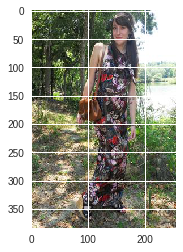

In [0]:

img = plt.imread(f'{path}/photos/999/{files[3]}')
plt.imshow(img);

In [0]:
img.shape

(384, 256, 3)



> We can verify the size specified in Readme file was right



### Conclusions

There are 900 paths in photo directory starting at 100 going to 999.

The images are RGB with size 384 x 256 x 3

There is 2183 duplicated files.

## Exploring the labels

---



### Label files

In [0]:
!cat /content//fashion550k/annotation/labels.txt

Black
Gray
White
Cream
Beige
Orange
Pink
Hot-Pink
Red
Ruby-Red
Chartreuse
Olive-Green
Green
Camel
Bronze
Brown
Turquoise-Blue
Light-Blue
Blue
Navy
Yellow
Mustard
Periwinkle
Purple
Gold
Silver
Top
T-Shirt
Blouse
Shirt
Cardigan
Cape
Blazer
Sweatshirt
Vest
Sweater
Jacket
Dress
Coat
Skirt
Pants
Jeans
Shorts
Jumper
Romper
Stockings_Tights
Leggings
Socks
Shoes
Sandals
Boots
Pumps
Flats
Loafers
Sneakers
Hat
Tie
Necklace
Glasses
Sunglasses
Scarf
Watch_Bracelet
Gloves
Swimwear
Bag_Purse
Belt

### Labels Distribution Graphs

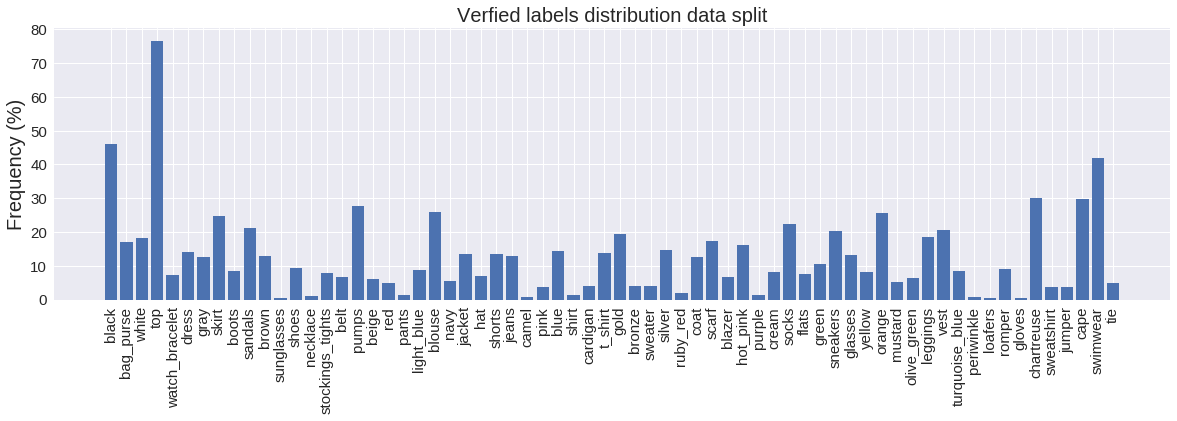

In [0]:
verified_labels_frequency = Fashion550kUtils.get_data_label_frequency(verified_annotations[data_split_ids])
sorted_verified_labels_frequency_ids = verified_labels_frequency.argsort()[::-1]
Fashion550kUtils.display_labels_distribution(
    verified_labels_frequency, 
    labels, 
    sorted_verified_labels_frequency_ids, 
    f'Verfied labels distribution data split')

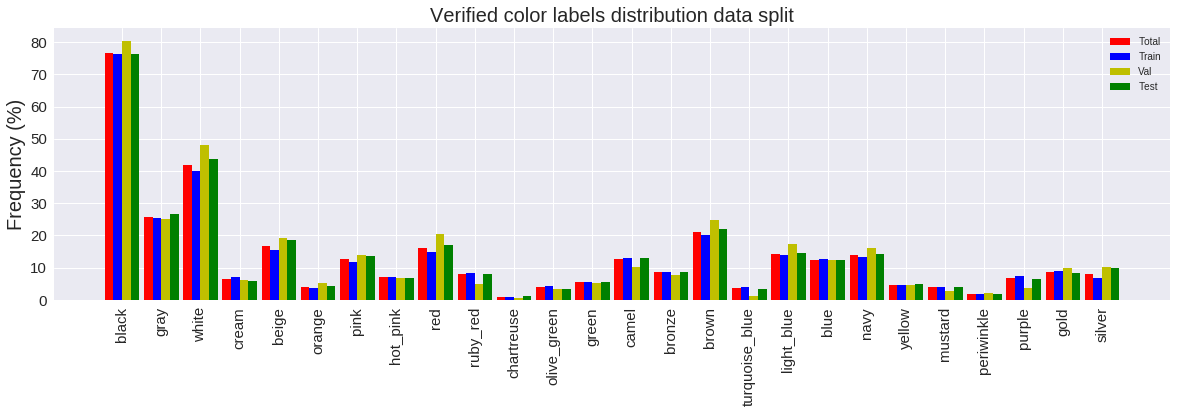

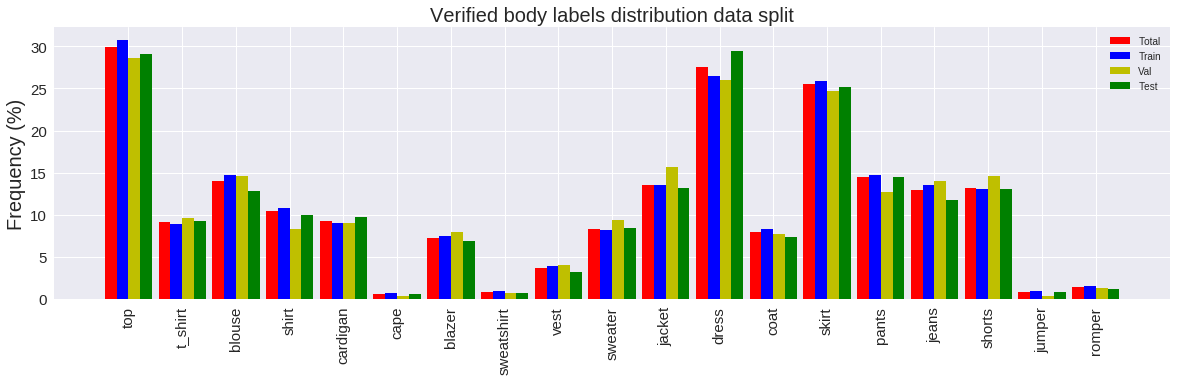

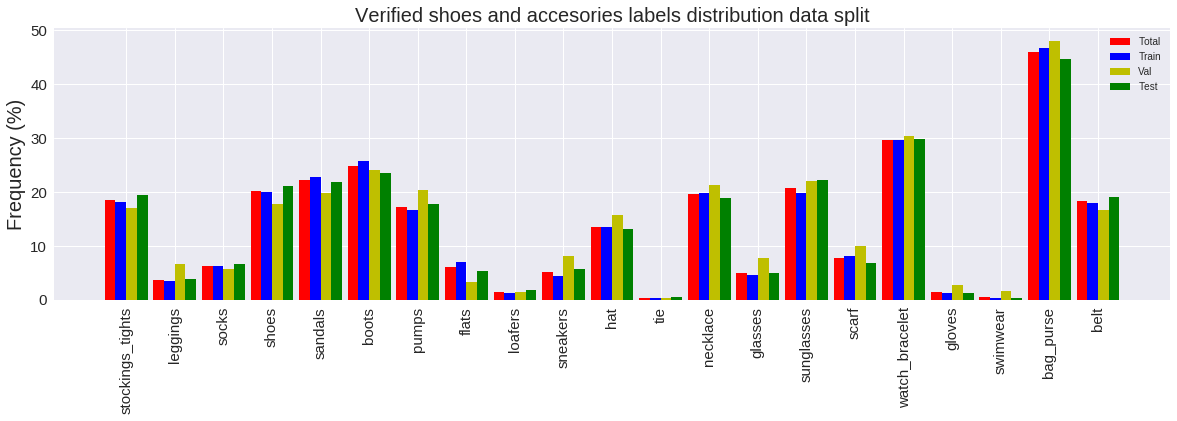

In [0]:
train_verified_labels_frequency = Fashion550kUtils.get_data_label_frequency(verified_annotations[train_ids])
val_verified_labels_frequency = Fashion550kUtils.get_data_label_frequency(verified_annotations[validids])
test_verified_labels_frequency = Fashion550kUtils.get_data_label_frequency(verified_annotations[testids])

Fashion550kUtils.display_data_split_labels_distribution(
    verified_labels_frequency,
    train_verified_labels_frequency, 
    val_verified_labels_frequency, 
    test_verified_labels_frequency, 
    labels, 
    color_labels_ids,
    'Verified color labels distribution data split'
)
Fashion550kUtils.display_data_split_labels_distribution(
    verified_labels_frequency,
    train_verified_labels_frequency, 
    val_verified_labels_frequency, 
    test_verified_labels_frequency, 
    labels, 
    body_labels_ids,
    'Verified body labels distribution data split'
)
Fashion550kUtils.display_data_split_labels_distribution(
    verified_labels_frequency,
    train_verified_labels_frequency, 
    val_verified_labels_frequency, 
    test_verified_labels_frequency, 
    labels, 
    shoes_accesories_labels_ids,
    'Verified shoes and accesories labels distribution data split'
)

In [0]:
Fashion550kUtils.display_photo_by_label_sample(
    valid_photos_in_file[data_split_ids],
    verified_annotations[data_split_ids],
    photos
)